<a href="https://colab.research.google.com/github/marinaD10/PRA3024/blob/main/Challenge1_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Identify a loud binary black hole signal in white, Gaussian noise.
# Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".
# The data are white, Gaussian noise containing a simulated BBH signal.
# 1. Load the data into memory. What are the sampling rate and duration of the data?
# 2. Plot the data in the time-domain.
# 3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
# 4. What is the time of the merger?

In [2]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
# Loading the data
from gwpy.timeseries import TimeSeries
gwpy_data = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [4]:
print(gwpy_data)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: None)


In [5]:
gwpy_data

<TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
             ..., -4.43135131e-23, -2.34576855e-22,
              4.51019899e-22]
            unit=Unit("ct"),
            t0=<Quantity -64. s>,
            dt=<Quantity 0.00024414 s>,
            name='H1:CHALLENGE1',
            channel=None)>

In [6]:
# Printing the duration of the data
gwpy_data.duration

<Quantity 128. s>

In [7]:
# Printing the sampling rate of the data
gwpy_data.sample_rate

<Quantity 4096. Hz>

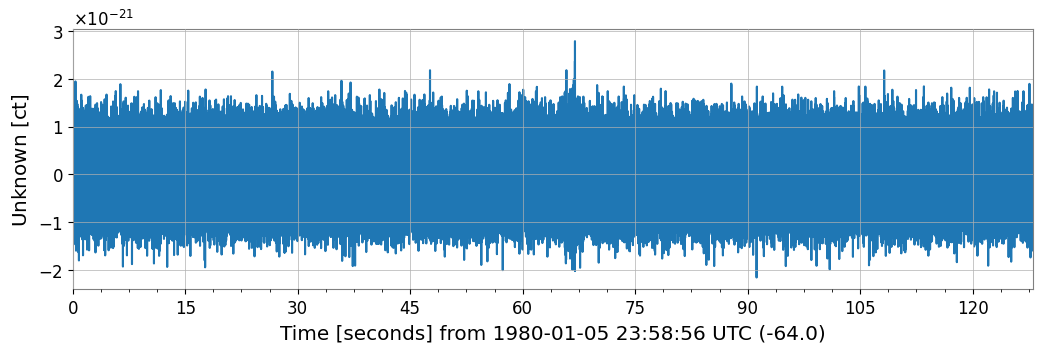

In [8]:
# Plotting the data in the time-domain
plot = gwpy_data.plot()

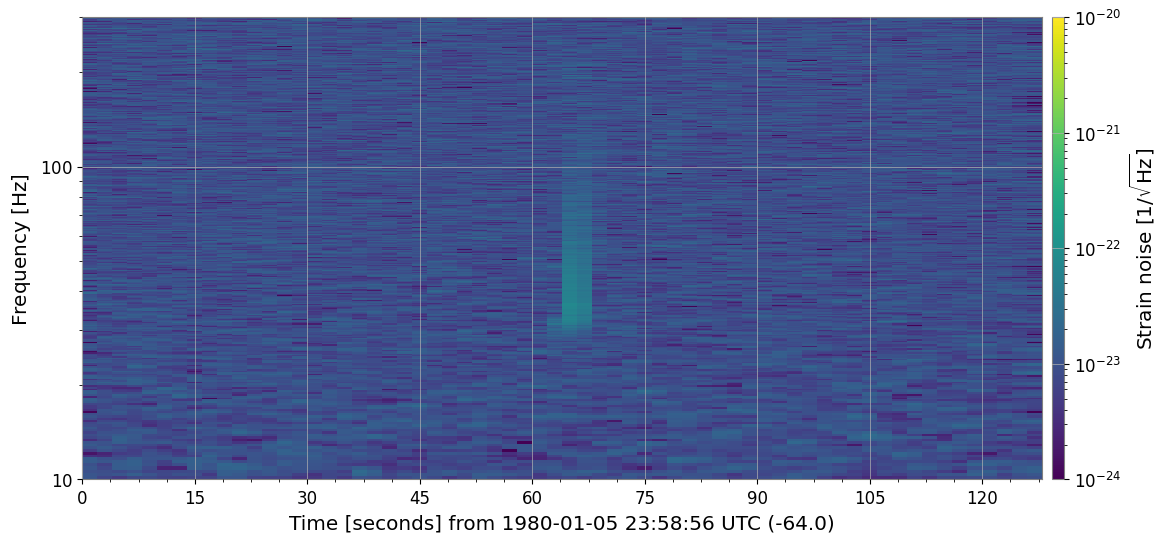

In [9]:
# Plotting a spectrogram of the data
specgram = gwpy_data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 300)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",)

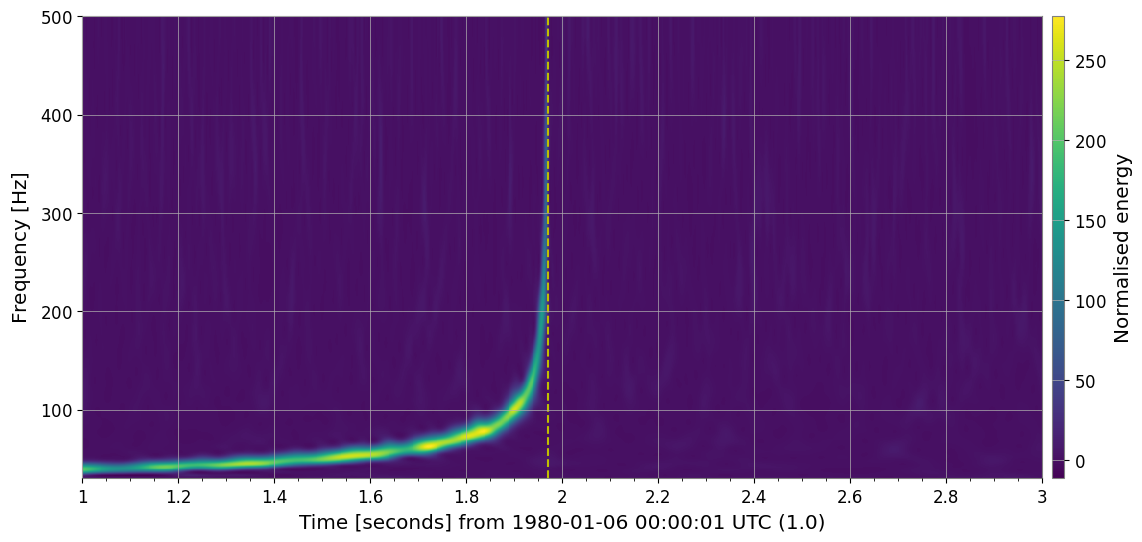

In [11]:
# This is plotting the q-transform of the data and finding the time of merger using a line
# and finding its intersection with the graph
hq = gwpy_data.q_transform(frange=(30, 500), qrange=(10, 15), outseg=(2,4))
plot = hq.plot()
plot.colorbar(label="Normalised energy")
import matplotlib.pyplot as plt
plt.axvline(x=2.97, color='y', linestyle='--')
plt.show()
# The time of merger is between 2 and 3, 2.97 to be exact